In [2]:
# 한글 깨짐 방지
import os
import csv
import numpy as np # 배열 기반 데이터 처리 패키지, 선형대수(행렬) 처리
import matplotlib  # 시각화 패키지
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

In [3]:
# 첫번째 header를 제외한 앞쪽 5건의 데이터 출력
f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

for i in range(5):
    print(next(data))
    
f.close()

['2020-01', '1호선', '0150', '서울역', '1,445,261', '1,337,363', '205,003', '197,190', '2020-02-03 12:20:00']
['2020-01', '1호선', '0151', '시청', '623,387', '633,560', '107,077', '107,246', '2020-02-03 12:20:00']
['2020-01', '1호선', '0152', '종각', '1,093,566', '1,049,286', '161,226', '151,128', '2020-02-03 12:20:00']
['2020-01', '1호선', '0153', '종로3가', '619,272', '595,970', '364,104', '338,705', '2020-02-03 12:20:00']
['2020-01', '1호선', '0154', '종로5가', '507,339', '513,603', '255,145', '245,168', '2020-02-03 12:20:00']


In [6]:
# 1) 유임 무임 승차 인원이 0인 경우 파악 # 모든 환승역이 아님
f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

for row in data:
    # 4 ~ 7: 유임승차,유임하차,무임승차,무임하차
    for i in range(4, 8): 
        row[i] = int(row[i].replace(',', '')) # 4, 5, 6, 7, ',' 제거
        if row[4] == 0:
            print(row[1], row[3], ' 유임 승차:', row[4])
        if row[6] == 0:
            print(row[1], row[3], ' 무임 승차:', row[6]) 
f.close()

경원선 창동  무임 승차: 0
경원선 창동  무임 승차: 0
분당선 복정  무임 승차: 0
분당선 복정  무임 승차: 0
경의선 서울역  무임 승차: 0
경의선 서울역  무임 승차: 0
경의선 홍대입구  무임 승차: 0
경의선 홍대입구  무임 승차: 0
경의선 계양  무임 승차: 0
경의선 계양  무임 승차: 0
경의선 검암  무임 승차: 0
경의선 검암  무임 승차: 0


In [16]:
# 2) 유임 승차 비율이 가장 높은 역
# 비율 = 유임 승차 인원 / 전체인원(유임 승차+무임승차)
f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

max_rate = 0

for row in data:
    pay = int(row[4].replace(",", ""))
    no_pay = int(row[6].replace(",", ""))
    
    if pay + no_pay == 0:
        continue
    
    rate = pay/(pay + no_pay)
    if max_rate < rate:
        max_rate = rate
        print(row, round(max_rate, 4)*100, '%')
        

f.close()

# 창동은 유동인구가 너무 적어 모집단을 대표하기 어려움
# 홍대입구 역이 95.41%로 가장 많은 유임 승차 인원을 차지하고 있음

['2020-01', '1호선', '0150', '서울역', '1,445,261', '1,337,363', '205,003', '197,190', '2020-02-03 12:20:00'] 87.58 %
['2020-01', '2호선', '0201', '시청', '665,333', '629,991', '57,265', '52,094', '2020-02-03 12:20:00'] 92.08 %
['2020-01', '2호선', '0202', '을지로입구', '1,343,584', '1,350,749', '110,507', '102,302', '2020-02-03 12:20:00'] 92.4 %
['2020-01', '2호선', '0209', '한양대', '212,741', '228,859', '13,680', '14,465', '2020-02-03 12:20:00'] 93.96 %
['2020-01', '2호선', '0222', '강남', '2,784,689', '2,866,156', '172,268', '154,536', '2020-02-03 12:20:00'] 94.17 %
['2020-01', '2호선', '0239', '홍대입구', '2,196,617', '2,362,935', '105,613', '102,529', '2020-02-03 12:20:00'] 95.41 %
['2020-01', '경원선', '1022', '창동', '15', '0', '0', '0', '2020-02-03 12:20:00'] 100.0 %
1.0


In [19]:
# 3) '창동역이 2곳임으로 창동역의 유임 승차 비율 출력
# 비율 = 유임 승차 인원 / 전체인원(유임 승차+무임승차)
f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

rate = 0 # 비율

for row in data:
    # 4~7: 유임승차, 유임하차, 무임승차, 무임하차
    if '창동' in row[3]:
        pay = int(row[4].replace(",", ""))
        no_pay = int(row[6].replace(",", ""))
        if row[4] + row[6] != 0:
            rate = pay/(pay+no_pay)
            print(row, round(rate, 4)*100, '%')

f.close()

['2020-01', '4호선', '0412', '창동', '627,704', '671,636', '197,399', '205,502', '2020-02-03 12:20:00'] 76.08 %
['2020-01', '경원선', '1022', '창동', '15', '0', '0', '0', '2020-02-03 12:20:00'] 100.0 %


In [21]:
# 4) 무임 승차 비율이 가장 높은 역
# 비율 = 무임 승차 인원 / 전체인원(유임 승차+무임승차)

f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

max_rate = 0

for row in data:
    pay = int(row[4].replace(",", ""))
    no_pay = int(row[6].replace(",", ""))
    
    if pay + no_pay == 0:
        continue
    
    rate = no_pay/(pay + no_pay)
    if max_rate < rate:
        max_rate = rate
        print(row, round(max_rate, 4)*100, '%')
        

f.close()

# 제기동은 약령시장의 영향으로 연령대가 높은 외지인이 많아 무임 승차 비율이 높음

['2020-01', '1호선', '0150', '서울역', '1,445,261', '1,337,363', '205,003', '197,190', '2020-02-03 12:20:00'] 12.42 %
['2020-01', '1호선', '0151', '시청', '623,387', '633,560', '107,077', '107,246', '2020-02-03 12:20:00'] 14.66 %
['2020-01', '1호선', '0153', '종로3가', '619,272', '595,970', '364,104', '338,705', '2020-02-03 12:20:00'] 37.03 %
['2020-01', '1호선', '0157', '제기동', '260,659', '255,740', '335,767', '360,747', '2020-02-03 12:20:00'] 56.3 %


In [25]:
# 5) 자신이 이용하는 역의 무임 승차 비율
# 비율 = 유임 승차 인원 / 전체인원(유임 승차+무임승차)
f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

village=input('역 이름 입력: ')
rate = 0 # 비율

for row in data:
    # 4~7: 유임승차, 유임하차, 무임승차, 무임하차
    if village in row[3]:
        pay = int(row[4].replace(",", ""))
        no_pay = int(row[6].replace(",", ""))
        if row[4] + row[6] != 0:
            rate = pay/(pay+no_pay)
            print(row, round(rate, 4)*100, '%')

f.close()

역 이름 입력: 서울
['2020-01', '1호선', '0150', '서울역', '1,445,261', '1,337,363', '205,003', '197,190', '2020-02-03 12:20:00'] 87.58 %
['2020-01', '1호선', '0158', '청량리(서울시립대입구)', '400,999', '406,766', '316,427', '322,368', '2020-02-03 12:20:00'] 55.88999999999999 %
['2020-01', '2호선', '0214', '강변(동서울터미널)', '1,119,525', '1,109,529', '132,190', '127,900', '2020-02-03 12:20:00'] 89.44 %
['2020-01', '2호선', '0228', '서울대입구(관악구청)', '1,297,520', '1,262,533', '192,496', '184,129', '2020-02-03 12:20:00'] 87.08 %
['2020-01', '3호선', '0317', '경복궁(정부서울청사)', '566,937', '579,541', '102,001', '93,531', '2020-02-03 12:20:00'] 84.75 %
['2020-01', '4호선', '0415', '미아(서울사이버대학)', '351,246', '324,261', '114,065', '113,364', '2020-02-03 12:20:00'] 75.49 %
['2020-01', '4호선', '0426', '서울역', '346,305', '630,930', '39,385', '49,492', '2020-02-03 12:20:00'] 89.79 %
['2020-01', '경부선', '1001', '서울역', '211,635', '46,598', '11,567', '2,139', '2020-02-03 12:20:00'] 94.82000000000001 %
['2020-01', '경원선', '1014', '청량리(서울시립대입구)', '353

In [28]:
# 6) 10만명 이상의 역을 대상으로 유임 승차 비율이 가장 높은 역
# 비율 = 유임 승차 인원 / 전체인원(유임 승차+무임승차)
f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

max_rate = 0
tot = 0 # 유임승차 + 무임승차

for row in data:
    
    pay = int(row[4].replace(",", ""))
    no_pay = int(row[6].replace(",", ""))
    tot = pay + no_pay
    
    if tot < 100000:
        continue
    if pay + no_pay == 0:
        continue
    
    rate = pay/(pay + no_pay)
    if max_rate < rate:
        max_rate = rate
        print(row, round(max_rate, 4)*100, '%')
        

f.close()

['2020-01', '1호선', '0150', '서울역', '1,445,261', '1,337,363', '205,003', '197,190', '2020-02-03 12:20:00'] 87.58 %
['2020-01', '2호선', '0201', '시청', '665,333', '629,991', '57,265', '52,094', '2020-02-03 12:20:00'] 92.08 %
['2020-01', '2호선', '0202', '을지로입구', '1,343,584', '1,350,749', '110,507', '102,302', '2020-02-03 12:20:00'] 92.4 %
['2020-01', '2호선', '0209', '한양대', '212,741', '228,859', '13,680', '14,465', '2020-02-03 12:20:00'] 93.96 %
['2020-01', '2호선', '0222', '강남', '2,784,689', '2,866,156', '172,268', '154,536', '2020-02-03 12:20:00'] 94.17 %
['2020-01', '2호선', '0239', '홍대입구', '2,196,617', '2,362,935', '105,613', '102,529', '2020-02-03 12:20:00'] 95.41 %
['2020-01', '공항철도 1호선', '4203', '홍대입구', '352,333', '348,652', '16,893', '16,021', '2020-02-03 12:20:00'] 95.42 %


In [ ]:
# 7) 최대 인원 산출 1, 각각의 변수 사용
# 유임승차 최대 인원, 유임하차 최대인원, 무임승차 최대인원, 무임하차 최대인원
f = open('./subwayfee_202001.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

mx1 = 0          # 유임승차 최대 인원
mx2 = 0          # 유임하차 최대 인원
mx3 = 0          # 무임승차 최대 인원
mx4 = 0          # 무임하차 최대 인원

mx_station1 = ''  # 유임승차 역이름
mx_station2 = ''  # 유임하차 역이름
mx_station3 = ''  # 무임승차 역이름
mx_station4 = ''  # 무임하차 역이름

for row in data:
    for i in range(4, 8): # 4, 5, 6, 7 --> '유임승차', '유임하차', '무임승차', '무임하차'
        row[i] = int(row[i].replace(',', ''))
        
    if mx1 < row[4]:  # 유임승차
        mx1 = row[4]
        mx_station1 = row[3] + ' ' + row[1] 

    if mx2 < row[5]:  # 유임하차
        mx2 = row[5]
        mx_station2 = row[3] + ' ' + row[1] 

    if mx3 < row[6]:  # 무임승차
        mx3 = row[6]
        mx_station3 = row[3] + ' ' + row[1] 

    if mx4 < row[7]:  # 무임하차
        mx4 = row[7]
        mx_station4 = row[3] + ' ' + row[1] 

print('유임승차: {0} {1:,}'.format(mx_station1, mx1))
print('유임하차: {0} {1:,}'.format(mx_station2, mx2))
print('무임승차: {0} {1:,}'.format(mx_station3, mx3))
print('무임하차: {0} {1:,}'.format(mx_station4, mx4))

f.close()

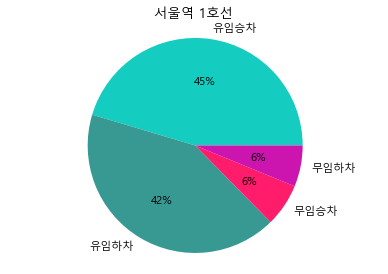

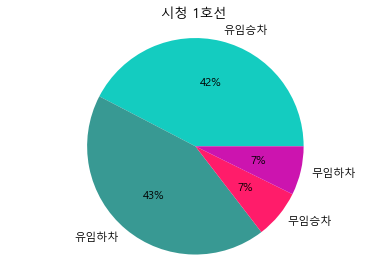

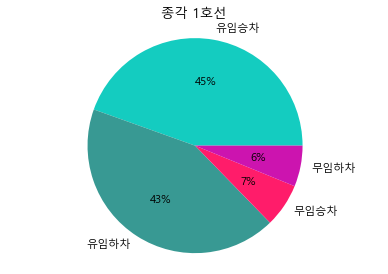

In [30]:
# 9) 전체중 앞부분 3개의 역별 승하차인원 pie plot 출력
f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

label = ['유임승차','유임하차','무임승차','무임하차']
color = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

for i in range(3):
    row = next(data)
    for i in range(4,8) :
        row[i] = int(row[i].replace(',', ''))
        
    plt.figure(dpi = 80) # 그래프 크기
    plt.title(row[3] + ' ' + row[1])  # 역이름 + 호선
    plt.pie(row[4:8], labels = label, colors = color, 
            autopct = '%1.f%%')
    plt.axis('equal') # 원으로 출력
    plt.show()

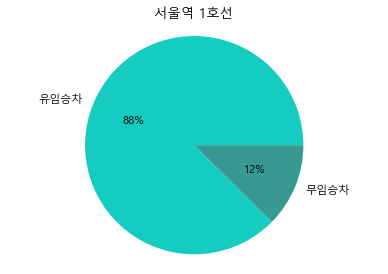

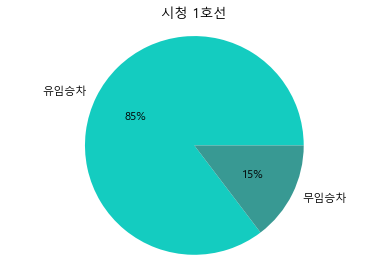

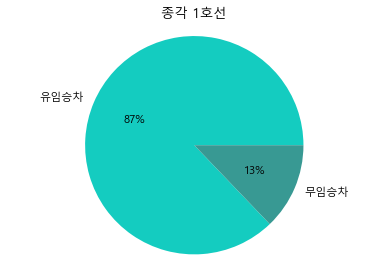

In [32]:
# 10) 전체중 앞부분 3개의 역별 유임승차, 무임승차인원 pie plot 출력
f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

label = ['유임승차', '무임승차']
color = ['#14CCC0', '#389993']

for i in range(3):
    row = next(data)
    for i in range(4,8) :
        row[i] = int(row[i].replace(',', ''))
        
    plt.figure(dpi = 80)
    plt.title(row[3] + ' ' + row[1])  # 역이름 + 호선
    # row[4:7:2]: 4, 6 간격을 2로 지정
    # area = []
    # area.append(row[4])
    # area.append(row[6])
    plt.pie(row[4:7:2], labels = label, colors = color, autopct = '%1.f%%')
    plt.axis('equal') # 원으로 출력
    plt.show()

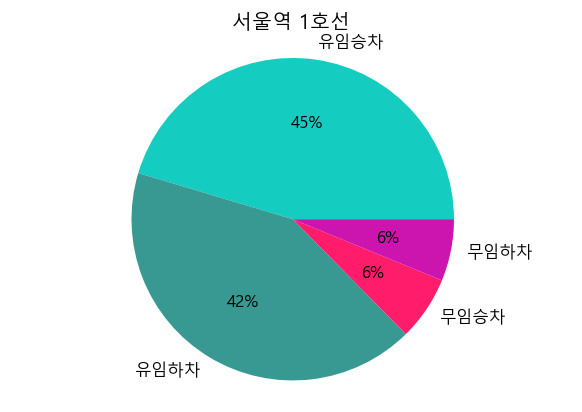

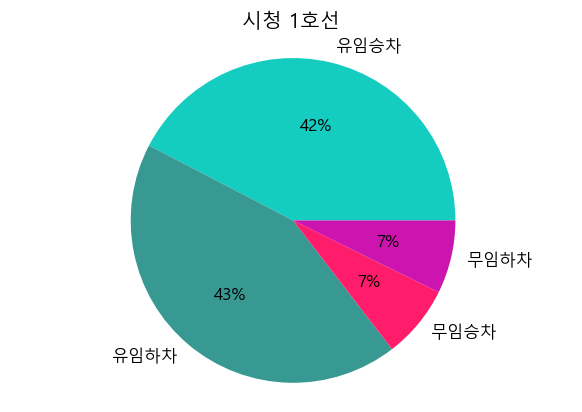

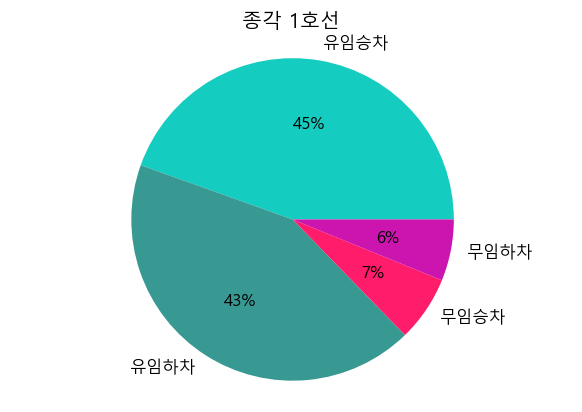

In [33]:
# 전체중 앞부분 3개의 역별 승하차인원 pie plot png file 출력
f = open('./subwayfee.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
header = next(data)

label = ['유임승차','유임하차','무임승차','무임하차']
color = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

# subway_img 폴더는 사전에 생성할것
if os.path.exists('./subway_img/') == False:
    os.mkdir('./subway_img/')

for i in range(3):
    row = next(data)
    for i in range(4,8) :
        row[i] = int(row[i].replace(',', ''))
        
    plt.figure(dpi = 120)
    plt.title(row[3] + ' ' + row[1])  # 역이름 + 호선
    plt.pie(row[4:8], labels = label, colors = color, autopct = '%1.f%%')
    plt.axis('equal') # 원으로 출력
    plt.savefig('./subway_img/' + row[3] + ' ' + row[1] + '.png') # 파일 생성
    plt.show()